<a href="https://colab.research.google.com/github/Rishiraj2499/Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [ ]:
aTuple = (1, 2, 3)
aList = list(aTuple)

In [ ]:
aList

[1, 2, 3]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/housing (3).csv"
pf = pd.read_csv(path)

In [ ]:
pf.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
pf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
pf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
pf.shape

(506, 14)

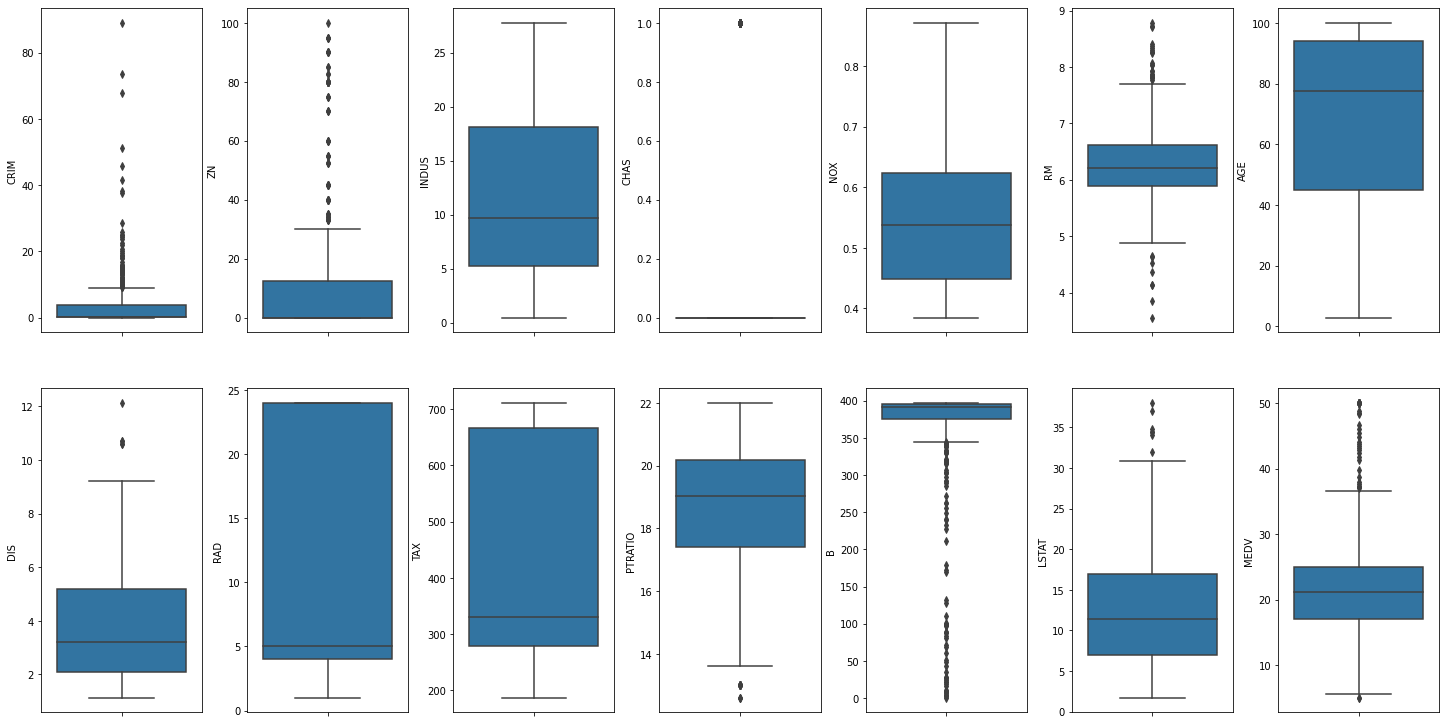

In [ ]:
import seaborn as sns
from scipy import stats
fig, axs = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in pf.items():
  sns.boxplot(y=k,data=pf,ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

# CRIM,ZN,RM and B seems to have outliners.

In [ ]:
for k,v in pf.items():
  Q1 = v.quantile(0.25)
  Q3 = v.quantile(0.75)
  irq = Q3-Q1
  v_col = v[(v<=Q1-1.5*irq)|(v>=Q3+1.5*irq)]
  perc = np.shape(v_col)[0]*100/np.shape(pf)[0]
  print("Column %s outliers=%.2f%%" % (k,perc))

Column CRIM outliers=13.04%
Column ZN outliers=13.44%
Column INDUS outliers=0.00%
Column CHAS outliers=100.00%
Column NOX outliers=0.00%
Column RM outliers=5.93%
Column AGE outliers=0.00%
Column DIS outliers=0.99%
Column RAD outliers=0.00%
Column TAX outliers=0.00%
Column PTRATIO outliers=2.96%
Column B outliers=15.22%
Column LSTAT outliers=1.38%
Column MEDV outliers=7.91%


# Lets Remove MEDV (50.0)

In [ ]:
pf = pf[~(pf['MEDV']>=50.0)]
print(np.shape(pf))

(490, 14)


# Lets see how this features plus MEDV distribution looks like

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

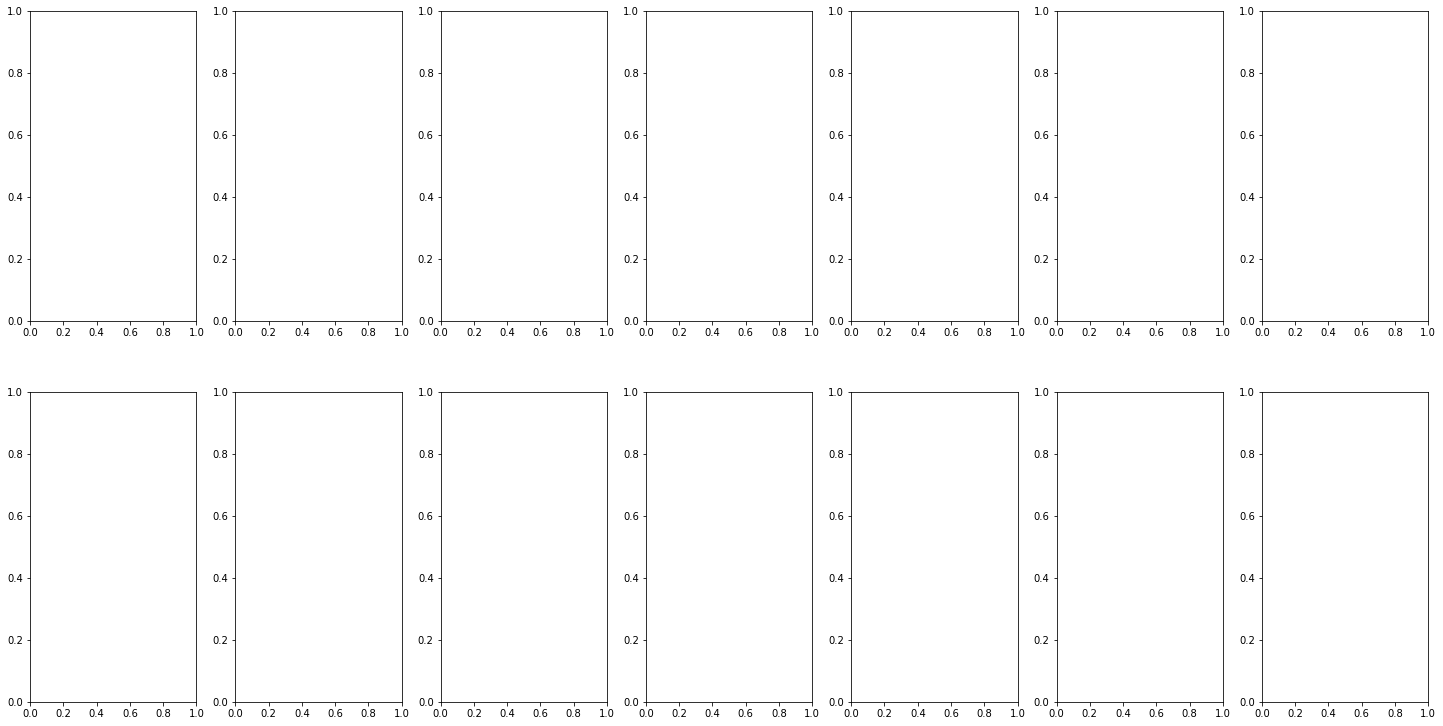

In [ ]:
fig, plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()

for k,v in pf.items():
  sns.distplot(v,ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

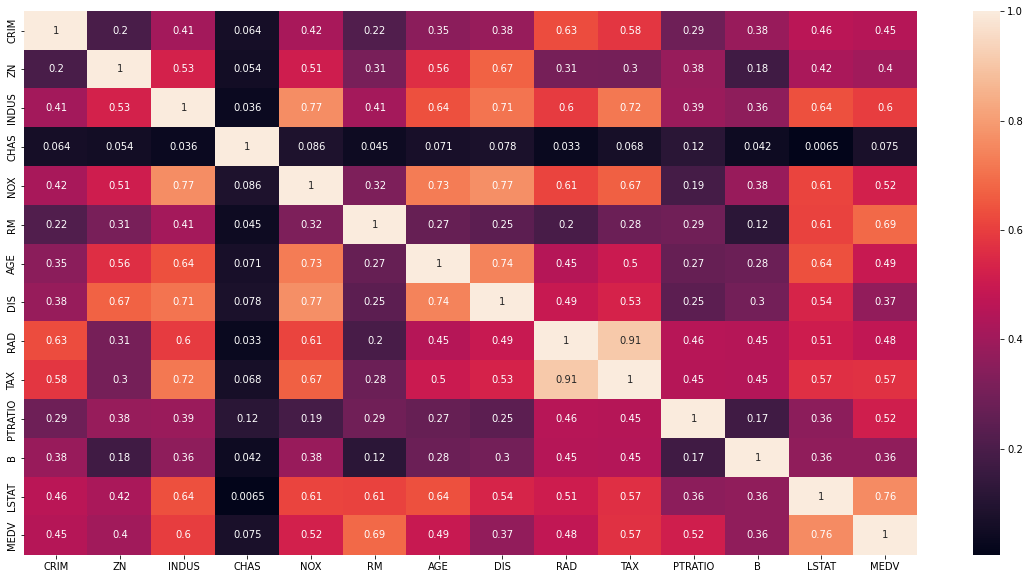

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(pf.corr().abs(),annot=True)

# From correrational heatmap we can see that TAX and RAD are highly correrated with MEDV so we will use other features to find the relation 

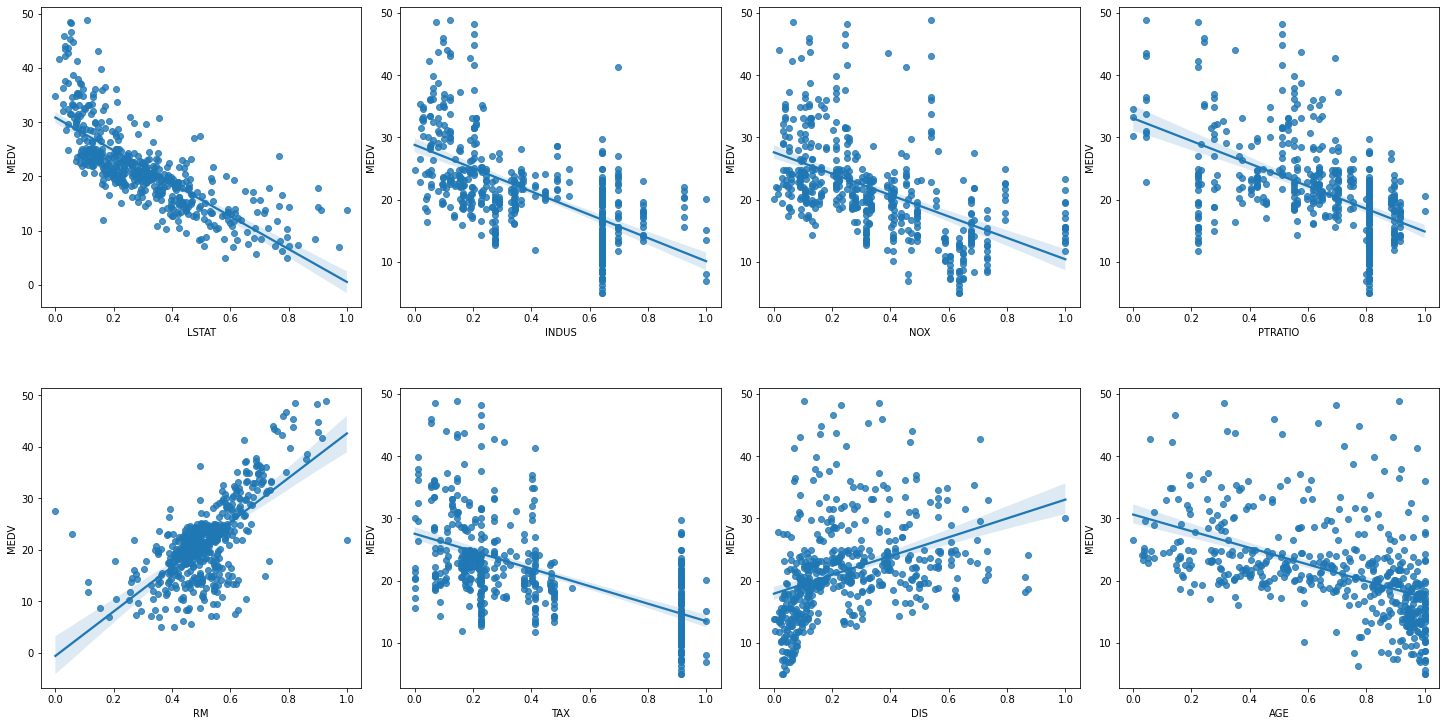

In [ ]:
from sklearn import preprocessing
# Lets scaled the columns before plotting them 
min_max_scaler = preprocessing.MinMaxScaler()
cols = ['LSTAT','INDUS','NOX','PTRATIO','RM','TAX','DIS','AGE']
x = pf.loc[:,cols]
y = pf['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x),columns=cols)
fig, axs = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for i ,k in enumerate(cols):
  sns.regplot(y=y,x=x[k],ax=axs[i])
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)
